# Protein Graph Mining: Basic Usage

## Parsing

The first step of graph mining with PyeMap is to create a `PDBGroup` object, and populate it `emap` objects for the PDBs of interest. Here, we'll fetch and parse a small set of flavoprotein PDBs.

In [1]:
import pyemap 
from pyemap.graph_mining import PDBGroup 
pdb_ids = ['1X0P', '1DNP', '1EFP', '1G28', '1IQR', '1IQU', '1NP7', '1O96', '1O97', '1QNF', '1U3C', '1U3D', '2IYG', '2J4D', '2WB2', '2Z6C', '3FY4', '3ZXS', '4EER', '4GU5', '4I6G', '4U63', '6FN2', '6KII', '6LZ3', '6PU0', '6RKF'] 
pg = PDBGroup('My Group') 
for pdb in pdb_ids: 
    pg.add_emap(pyemap.fetch_and_parse(pdb)) 

Fetching PDB 1X0P from RSCB Database...
Success!
Parsing file: /Users/jamesrgayvert/Documents/work/emap/pyemap/examples/1X0P.pdb


/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11957.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11984.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12011.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12038.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 12065.
  warnings.warn(
/User

Identified 10 non-protein ET active moieties.
Fetching PDB 1DNP from RSCB Database...
Success!
Parsing file: /Users/jamesrgayvert/Documents/work/emap/pyemap/examples/1DNP.pdb


/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8007.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8093.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8179.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8367.
  warnings.warn(


Identified 6 non-protein ET active moieties.
Fetching PDB 1EFP from RSCB Database...
Success!
Parsing file: /Users/jamesrgayvert/Documents/work/emap/pyemap/examples/1EFP.pdb
Identified 6 non-protein ET active moieties.
Fetching PDB 1G28 from RSCB Database...


/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8673.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8749.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8825.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8853.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8876.
  warnings.warn(
/Users/jam

Success!
Parsing file: /Users/jamesrgayvert/Documents/work/emap/pyemap/examples/1G28.pdb
Identified 4 non-protein ET active moieties.
Fetching PDB 1IQR from RSCB Database...


/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3726.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3757.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3788.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3819.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3850.
  warnings.warn(
/Users/jam

Success!
Parsing file: /Users/jamesrgayvert/Documents/work/emap/pyemap/examples/1IQR.pdb
Identified 2 non-protein ET active moieties.
Fetching PDB 1IQU from RSCB Database...
Success!
Parsing file: /Users/jamesrgayvert/Documents/work/emap/pyemap/examples/1IQU.pdb
Identified 3 non-protein ET active moieties.
Fetching PDB 1NP7 from RSCB Database...
Success!
Parsing file: /Users/jamesrgayvert/Documents/work/emap/pyemap/examples/1NP7.pdb
Identified 4 non-protein ET active moieties.
Fetching PDB 1O96 from RSCB Database...


/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8597.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8660.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8718.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8919.
  warnings.warn(


Success!
Parsing file: /Users/jamesrgayvert/Documents/work/emap/pyemap/examples/1O96.pdb


/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18212.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18235.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 18288.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18311.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 18364.
  warnings.warn(
/User

Identified 12 non-protein ET active moieties.
Fetching PDB 1O97 from RSCB Database...
Success!
Parsing file: /Users/jamesrgayvert/Documents/work/emap/pyemap/examples/1O97.pdb
Identified 3 non-protein ET active moieties.
Fetching PDB 1QNF from RSCB Database...


/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4831.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4854.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4907.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5194.
  warnings.warn(


Success!
Parsing file: /Users/jamesrgayvert/Documents/work/emap/pyemap/examples/1QNF.pdb
Identified 3 non-protein ET active moieties.
Fetching PDB 1U3C from RSCB Database...
Success!
Parsing file: /Users/jamesrgayvert/Documents/work/emap/pyemap/examples/1U3C.pdb
Identified 2 non-protein ET active moieties.
Fetching PDB 1U3D from RSCB Database...
Success!
Parsing file: /Users/jamesrgayvert/Documents/work/emap/pyemap/examples/1U3D.pdb
Identified 3 non-protein ET active moieties.
Fetching PDB 2IYG from RSCB Database...
Success!
Parsing file: /Users/jamesrgayvert/Documents/work/emap/pyemap/examples/2IYG.pdb
Identified 2 non-protein ET active moieties.
Fetching PDB 2J4D from RSCB Database...


/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2211.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2250.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2289.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2318.
  warnings.warn(


Success!
Parsing file: /Users/jamesrgayvert/Documents/work/emap/pyemap/examples/2J4D.pdb
Identified 8 non-protein ET active moieties.
Fetching PDB 2WB2 from RSCB Database...


/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8830.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8916.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9002.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9439.
  warnings.warn(


Success!
Parsing file: /Users/jamesrgayvert/Documents/work/emap/pyemap/examples/2WB2.pdb
Identified 31 non-protein ET active moieties.


/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5734.
  warnings.warn(


Fetching PDB 2Z6C from RSCB Database...
Success!
Parsing file: /Users/jamesrgayvert/Documents/work/emap/pyemap/examples/2Z6C.pdb
Identified 2 non-protein ET active moieties.
Fetching PDB 3FY4 from RSCB Database...


/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2342.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2373.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2404.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2483.
  warnings.warn(


Success!
Parsing file: /Users/jamesrgayvert/Documents/work/emap/pyemap/examples/3FY4.pdb


/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13425.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13510.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13590.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13685.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13929.
  warnings.warn(
/User

Identified 16 non-protein ET active moieties.
Fetching PDB 3ZXS from RSCB Database...
Success!
Parsing file: /Users/jamesrgayvert/Documents/work/emap/pyemap/examples/3ZXS.pdb


/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 25427.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 25513.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 25599.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 25685.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 26042.
  warnings.warn(
/User

Identified 12 non-protein ET active moieties.
Fetching PDB 4EER from RSCB Database...
Success!
Parsing file: /Users/jamesrgayvert/Documents/work/emap/pyemap/examples/4EER.pdb
Identified 1 non-protein ET active moieties.
Fetching PDB 4GU5 from RSCB Database...
Success!
Parsing file: /Users/jamesrgayvert/Documents/work/emap/pyemap/examples/4GU5.pdb


/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9311.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9365.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9419.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9584.
  warnings.warn(


Identified 4 non-protein ET active moieties.
Fetching PDB 4I6G from RSCB Database...
Success!
Parsing file: /Users/jamesrgayvert/Documents/work/emap/pyemap/examples/4I6G.pdb


/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16540.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16646.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16752.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16902.
  warnings.warn(


Identified 4 non-protein ET active moieties.
Fetching PDB 4U63 from RSCB Database...
Success!
Parsing file: /Users/jamesrgayvert/Documents/work/emap/pyemap/examples/4U63.pdb
Identified 3 non-protein ET active moieties.
Fetching PDB 6FN2 from RSCB Database...
Success!
Parsing file: /Users/jamesrgayvert/Documents/work/emap/pyemap/examples/6FN2.pdb
Identified 3 non-protein ET active moieties.
Fetching PDB 6KII from RSCB Database...
Success!
Parsing file: /Users/jamesrgayvert/Documents/work/emap/pyemap/examples/6KII.pdb
Identified 4 non-protein ET active moieties.
Fetching PDB 6LZ3 from RSCB Database...
Success!
Parsing file: /Users/jamesrgayvert/Documents/work/emap/pyemap/examples/6LZ3.pdb


/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17212.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17265.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17318.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17371.
  warnings.warn(


Identified 8 non-protein ET active moieties.
Fetching PDB 6PU0 from RSCB Database...
Success!
Parsing file: /Users/jamesrgayvert/Documents/work/emap/pyemap/examples/6PU0.pdb
Identified 2 non-protein ET active moieties.
Fetching PDB 6RKF from RSCB Database...
Success!
Parsing file: /Users/jamesrgayvert/Documents/work/emap/pyemap/examples/6RKF.pdb
Identified 12 non-protein ET active moieties.


/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 32953.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 33025.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 33084.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 33151.
  warnings.warn(
/Users/jamesrgayvert/miniforge3/envs/rosettapy39/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 33210.
  warnings.warn(
/User

## Generating Protein Graphs

The next step is to generate the graphs for each PDB. One can specify the chains, ET active moieties, residues, and any other kwargs from `pyemap.process`.

In [2]:
process_kwargs = {'sdef': None, 'dist_def': 'COM', 'rsa_thresh': 0.05, 'rd_thresh': 3.03, 'distance_cutoff': 20.0, 'percent_edges': 1.0, 'edge_prune': 'DEGREE', 'num_st_dev_edges': 1.0, 'coef_alpha': 1.0, 'exp_beta': 2.3, 'r_offset': 0.0} 
chains = {'1X0P': ['A'], '1DNP': ['A'], '1EFP': ['A'], '1G28': ['A'], '1IQR': ['A'], '1IQU': ['A'], '1NP7': ['A'], '1O96': ['A'], '1O97': ['C'], '1QNF': ['A'], '1U3C': ['A'], '1U3D': ['A'], '2IYG': ['A'], '2J4D': ['A'], '2WB2': ['A'], '2Z6C': ['A'], '3FY4': ['A'], '3ZXS': ['A'], '4EER': ['A'], '4GU5': ['A'], '4I6G': ['A'], '4U63': ['A'], '6FN2': ['A'], '6KII': ['A'], '6LZ3': ['A'], '6PU0': ['A'], '6RKF': ['A']} 
include_residues = ['W', 'Y'] 
included_eta_moieties = {'1X0P': ['FAD9150(A)'], '1DNP': ['FAD472(A)-1', 'FAD472(A)-2', 'MHF473(A)'], '1EFP': ['FAD399(A)-1', 'FAD399(A)-2', 'AMP400(A)'], '1G28': ['FMN1033(A)'], '1IQR': ['FAD421(A)-1', 'FAD421(A)-2'], '1IQU': ['TDR500(A)', 'FAD421(A)-1', 'FAD421(A)-2'], '1NP7': ['FAD500(A)-1', 'FAD500(A)-2'], '1O96': ['AMP1263(A)'], '1O97': ['AMP1262(C)'], '1QNF': ['FAD485(A)-1', 'FAD485(A)-2', 'HDF486(A)'], '1U3C': ['FAD510(A)-1', 'FAD510(A)-2'], '1U3D': ['FAD510(A)-1', 'FAD510(A)-2', 'ANP511(A)'], '2IYG': ['FMN1122(A)'], '2J4D': ['FAD1498(A)-1', 'FAD1498(A)-2', 'MHF1499(A)-1', 'MHF1499(A)-2'], '2WB2': ['FAD1510(A)-1', 'FAD1510(A)-2'], '2Z6C': ['FMN500(A)'], '3FY4': ['IMD901(A)', 'IMD902(A)', 'IMD905(A)', 'FAD900(A)-1', 'FAD900(A)-2'], '3ZXS': ['FAD1509(A)-1', 'FAD1509(A)-2', 'DLZ1511(A)', 'SF41510(A)'], '4EER': ['FMN1001(A)'], '4GU5': ['FAD602(A)-1', 'FAD602(A)-2'], '4I6G': ['FAD900(A)-1', 'FAD900(A)-2'], '4U63': ['MHF1001(A)', 'FAD1002(A)-1', 'FAD1002(A)-2'], '6FN2': ['FAD601(A)-1', 'FAD601(A)-2', 'HDF602(A)'], '6KII': ['FAD501(A)-1', 'FAD501(A)-2', 'MHF502(A)-1', 'MHF502(A)-2'], '6LZ3': ['FAD701(A)-1', 'FAD701(A)-2'], '6PU0': ['FAD501(A)-1', 'FAD501(A)-2'], '6RKF': ['FAD401(A)-1', 'FAD401(A)-2']} 

Call `process.emaps` to generate graphs for all of the PDBs.

In [3]:
pg.process_emaps(chains=chains, eta_moieties=included_eta_moieties, include_residues=include_residues, **process_kwargs) 

/Users/jamesrgayvert/Documents/work/emap/pyemap/pyemap/process_data.py:732: UserWarning: Protein surface will not be computed. All residues will be classified as buried...
  warnings.warn("Protein surface will not be computed. All residues will be classified as buried...")


## Generate graph database
The next step is to classify the nodes and edges. One can define "substitutions" for nodes, and thresholds for edges.

In [4]:
# W and Y will be interchangeable and given the label 'X'
substitutions = ['W','Y']
# edges with weights > 12 are distinguished from those with weights < 12
edge_thresholds = [12] 
pg.generate_graph_database(sub=[],edge_thresh=edge_thresholds) 

## Mine for subgraphs
There are two types of searches available in PyeMap. One can mine for all possible subgraphs:

In [5]:
pg.run_gspan(19)
print(pg.mining_report())

Overview of all subgraphs:
Generated:
2022-01-27 15:29:22.923270
Graph Parameters:
{'sdef': None, 'dist_def': 'COM', 'rsa_thresh': 0.05, 'rd_thresh': 3.03, 'distance_cutoff': 20.0, 'percent_edges': 1.0, 'edge_prune': 'DEGREE', 'num_st_dev_edges': 1.0, 'coef_alpha': 1.0, 'exp_beta': 2.3, 'r_offset': 0.0, 'max_degree': 4}
Included residues:
['W', 'Y']
Mining parameters:
{'min_support': 19, 'min_num_vertices': 4, 'max_num_vertices': inf, 'graph_specification': []}
Chains:
{'1X0P': ['A'], '1DNP': ['A'], '1EFP': ['A'], '1G28': ['A'], '1IQR': ['A'], '1IQU': ['A'], '1NP7': ['A'], '1O96': ['A'], '1O97': ['C'], '1QNF': ['A'], '1U3C': ['A'], '1U3D': ['A'], '2IYG': ['A'], '2J4D': ['A'], '2WB2': ['A'], '2Z6C': ['A'], '3FY4': ['A'], '3ZXS': ['A'], '4EER': ['A'], '4GU5': ['A'], '4I6G': ['A'], '4U63': ['A'], '6FN2': ['A'], '6KII': ['A'], '6LZ3': ['A'], '6PU0': ['A'], '6RKF': ['A']}
Included non protein moieties:
{'1X0P': ['FAD9150(A)'], '1DNP': ['FAD472(A)-1', 'FAD472(A)-2', 'MHF473(A)'], '1EFP': ['F

Or search for a specific pattern:

In [6]:
pg.find_subgraph('WWW#')
print(pg.mining_report())

Overview of all subgraphs:
Generated:
2022-01-27 15:29:23.054724
Graph Parameters:
{'sdef': None, 'dist_def': 'COM', 'rsa_thresh': 0.05, 'rd_thresh': 3.03, 'distance_cutoff': 20.0, 'percent_edges': 1.0, 'edge_prune': 'DEGREE', 'num_st_dev_edges': 1.0, 'coef_alpha': 1.0, 'exp_beta': 2.3, 'r_offset': 0.0, 'max_degree': 4}
Included residues:
['W', 'Y']
Mining parameters:
{'support': None, 'min_num_vertices': None, 'max_num_vertices': None, 'graph_specification': 'WWW#'}
Chains:
{'1X0P': ['A'], '1DNP': ['A'], '1EFP': ['A'], '1G28': ['A'], '1IQR': ['A'], '1IQU': ['A'], '1NP7': ['A'], '1O96': ['A'], '1O97': ['C'], '1QNF': ['A'], '1U3C': ['A'], '1U3D': ['A'], '2IYG': ['A'], '2J4D': ['A'], '2WB2': ['A'], '2Z6C': ['A'], '3FY4': ['A'], '3ZXS': ['A'], '4EER': ['A'], '4GU5': ['A'], '4I6G': ['A'], '4U63': ['A'], '6FN2': ['A'], '6KII': ['A'], '6LZ3': ['A'], '6PU0': ['A'], '6RKF': ['A']}
Included non protein moieties:
{'1X0P': ['FAD9150(A)'], '1DNP': ['FAD472(A)-1', 'FAD472(A)-2', 'MHF473(A)'], '1EFP

## Analysis: Subgraph Patterns
The identified subgraphs are stored in the `subgraph_patterns` dictionary.

In [7]:
pg.subgraph_patterns

{'1_WWW#_18': <pyemap.graph_mining.frequent_subgraph.SubgraphPattern at 0x183e87cd0>,
 '2_WWW#_14': <pyemap.graph_mining.frequent_subgraph.SubgraphPattern at 0x183e67fa0>,
 '3_WWW#_4': <pyemap.graph_mining.frequent_subgraph.SubgraphPattern at 0x18403c160>,
 '4_WWW#_2': <pyemap.graph_mining.frequent_subgraph.SubgraphPattern at 0x183fe9100>,
 '5_WWW#_2': <pyemap.graph_mining.frequent_subgraph.SubgraphPattern at 0x18403ca90>,
 '6_WWW#_2': <pyemap.graph_mining.frequent_subgraph.SubgraphPattern at 0x18403cb20>,
 '7_WWW#_1': <pyemap.graph_mining.frequent_subgraph.SubgraphPattern at 0x184030430>}

ID:1_WWW#_18
Support:18
Where:['1DNP', '1IQR', '1IQU', '1NP7', '1QNF', '1U3C', '1U3D', '2J4D', '2WB2', '3FY4', '3ZXS', '4GU5', '4I6G', '4U63', '6FN2', '6KII', '6LZ3', '6PU0']
Adjacency list:
W0:[W1(1)]
W1:[W0(1), W2(1)]
W2:[W1(1), NP3(1)]
NP3:[W2(1)]



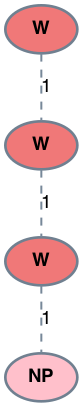

In [8]:
sg = pg.subgraph_patterns['1_WWW#_18']
print(sg.general_report())
sg.subgraph_to_Image()

## Analysis: Protein Subgraphs
To identify the specific residues in each PDB involved in the identified patterns, one should first call `find_protein_subgraphs`, and the identified **protein subgraphs** are stored in the `protein_subgraphs` dictionary.

In [9]:
sg.find_protein_subgraphs()
sg.protein_subgraphs

{'4U63_1': <networkx.classes.graph.Graph at 0x18405c730>,
 '4U63_2': <networkx.classes.graph.Graph at 0x183ecb4c0>,
 '4U63_3': <networkx.classes.graph.Graph at 0x183fcc190>,
 '4U63_4': <networkx.classes.graph.Graph at 0x183fcc070>,
 '4U63_5': <networkx.classes.graph.Graph at 0x184037340>,
 '6KII_6': <networkx.classes.graph.Graph at 0x183fcc4f0>,
 '3ZXS_7': <networkx.classes.graph.Graph at 0x184037a00>,
 '6KII_8': <networkx.classes.graph.Graph at 0x183fcc8b0>,
 '3ZXS_9': <networkx.classes.graph.Graph at 0x184037130>,
 '4U63_10': <networkx.classes.graph.Graph at 0x18405cbb0>,
 '4U63_11': <networkx.classes.graph.Graph at 0x18403c310>,
 '6KII_12': <networkx.classes.graph.Graph at 0x183fcc790>,
 '6LZ3_13': <networkx.classes.graph.Graph at 0x183fccaf0>,
 '1U3C_14': <networkx.classes.graph.Graph at 0x184030a30>,
 '1U3D_15': <networkx.classes.graph.Graph at 0x184037610>,
 '6KII_16': <networkx.classes.graph.Graph at 0x183fcc670>,
 '1NP7_17': <networkx.classes.graph.Graph at 0x18405c100>,
 '6KII

In [10]:
sg.subgraph_to_Image('1U3D_51')

KeyError: '1U3D_50'

### Clustering
Protein subgraphs are clustered into groups based on sequence or structural similarity. By default, structural clustering is used, and this can be switched to sequence using `set_clustering`.

In [ ]:
print(sg.groups)

In [ ]:
sg.set_clustering("sequence")
print(sg.groups)

### Visualize in nglview

In [11]:
import nglview as nv
view = nv.show_file(sg.support['1U3D'].file_path)
view.clear_representations()
view.add_cartoon(color="lightgray")
sg.visualize_subgraph_in_nglview('1U3D_51',view)
view

NGLWidget()

In [ ]:
print(type(view))

In [ ]:
print(sg.support['1U3D'].sequences)